In [23]:
import numpy as np
import gc
import os
import sys
sys.path.append("../")
sys.path.append("../03_experimental_data_chemical_shifts/")
sys.path.append("/home/ricky/Documents/from_work/git/NMR_FF_tools/relaxation_times/")

import numpy as np
import relaxation_times as rt
import manage_files as mf
import matplotlib.pyplot as plt

import SRT_optimization as srt
import handle_BMBR as BMBR
from matplotlib.backends.backend_pdf import PdfPages

gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

gc.collect()

199337

<H3>Load in data from simulations</H3>

In [2]:
output_path_relax="../../../CorysPeptides/relax_times_yamls/protein/raw_data/"            # folder to save spin relaxation times yaml files, 
output_path_timescales="../../../CorysPeptides/timescales_yamls/protein/raw_data/"  # folder to save timescale yaml files
 
relaxation_yamls_prot,timescales_yamls_prot=mf.load_yaml_files(output_path_relax,output_path_timescales)


output_path_relax="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_efstathia/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_efstathia/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls_efstathia,timescales_yamls_efsthatia=mf.load_yaml_files(output_path_relax,output_path_timescales)


output_path_relax="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/calmodulin/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/calmodulin/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls_calmodulin,timescales_yamls_calmodulin=mf.load_yaml_files(output_path_relax,output_path_timescales)


output_path_relax="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/CDNF/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/CDNF/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls_CDNF,timescales_yamls_CDNF=mf.load_yaml_files(output_path_relax,output_path_timescales)



output_path_relax="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/EN2/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/EN2/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls_EN2,timescales_yamls_EN2=mf.load_yaml_files(output_path_relax,output_path_timescales)



output_path_relax="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/musMANF/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/musMANF/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls_musMANF,timescales_yamls_musMANF=mf.load_yaml_files(output_path_relax,output_path_timescales)



output_path_relax="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/tonB/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../../CorysPeptides/sds_vs_peptide/timescales_yaml_amanda/tonB/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls_tonB,timescales_yamls_tonB=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * GWALP_dimer_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_23500water_replica1
   * GWALP_monomer_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_73800water_replica1
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica3
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * GWALP_dimer_micelle_60SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * GWALP_monomer_micelle_70SDS_CHARMM_310K_Na_Neut_OPC_replica1
   * hMff_micelle_45SDS_CHARMM_310K_Na_Neut_OPC_replica2
   * eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
   * GWALP_dimer_micelle_70SDS_CHARMM_310K_N


 
Timescales exist for:

   * ome_local_sandelam_Desktop_CDNF_md2_amberff03ws_model2_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_amber99SB-disp_CDNF_amber99SB-disp_model6_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_amber99SB-disp_CDNF_amber99SB-disp_model4_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_DESamber_CDNF_DESamber_model6_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_corrected_md2_amber99SB-ILDN_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_corrected_amber99SB-disp_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_md2_amber99SB-ILDN_model8_unoriented
   * ome_local_sandelam_Desktop_CDNF_md2_amberff03ws_model4_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_DESamber_CDNF_DESamber_model4_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_amber99SB-disp_CDNF_amber99SB-disp_model2_unoriented
   * edia_sandelam_sandelamstorage2_sandelam_CDNF_md2_amber99SB-ILDN_model1_un

In [93]:
gc.collect()

0

<H3>Analyze and save effective times from MD at different fields</H3>

In [99]:
plt.rcParams["figure.autolayout"] = True
smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}

all_fields=sorted(list(set(list(smallers.keys())+list(biggers.keys()))))

save_labels=["small_peptides",
       "peptides_SDSmicelles",
       "Calmodulin",
       "CDNF",
       "EN2",
       "musMANF",
       "TonB"]




a=[timescales_yamls_efsthatia,timescales_yamls_prot,
                              timescales_yamls_calmodulin,timescales_yamls_CDNF,
                              timescales_yamls_EN2,timescales_yamls_musMANF,
                              timescales_yamls_tonB]

for i,timescales in enumerate(a):
    results=[]
    eff_times=[]

    
    for sim in timescales:        
        #check if timesales exist
        for ana2 in timescales[sim]:
            info=timescales[sim][ana2]["info"]
            #select the analysis that we used
            if (info["04_smallest_corr_time_[s]"]==10**(-12) and
                info["05_biggest_corr_time_[s]"]==10**(-7) and
                info["03_N_exp_to_fit"]==100 and
                info["00_nuclei"]=='15N'):

                for bond in timescales[sim][ana2]["results"]["Coeff"]:
                    if timescales[sim][ana2]["results"]["Coeff"][bond][-1]>0:
                        timescales[sim][ana2]["results"]["Coeff"][bond][-1]=0
                    
                    coeff=timescales[sim][ana2]["results"]["Coeff"][bond]
                    ctime=timescales[sim][ana2]["results"]["Ctime"]
                    effTime=sum(t*k for t,k in zip(coeff,ctime))*10**9
                    
                    effective_times=[]
                    for field in all_fields:
                        magnetic_field=field*2*np.pi/gammaH*10**6
                        
                        T1,T2,NOE=rt.get_relaxation_N(magnetic_field,coeff,ctime,0)
                        #effective_times.append(srt.find_tau_from_R2_np_poly1d(magnetic_field,float(1/T2))*10**9)
                        effective_times.append(srt.find_tau_from_R2_hyperbolic_approximation(field,float(1/T2))*10**9)
                    effective_times.append(effTime)
                    results.append(effective_times)
    results=np.array(results)
    np.savetxt(f'find_tau_from_R2_hyperbolic_approximation/{save_labels[i]}_effTimes_at_different_fields.dat',results)
                    

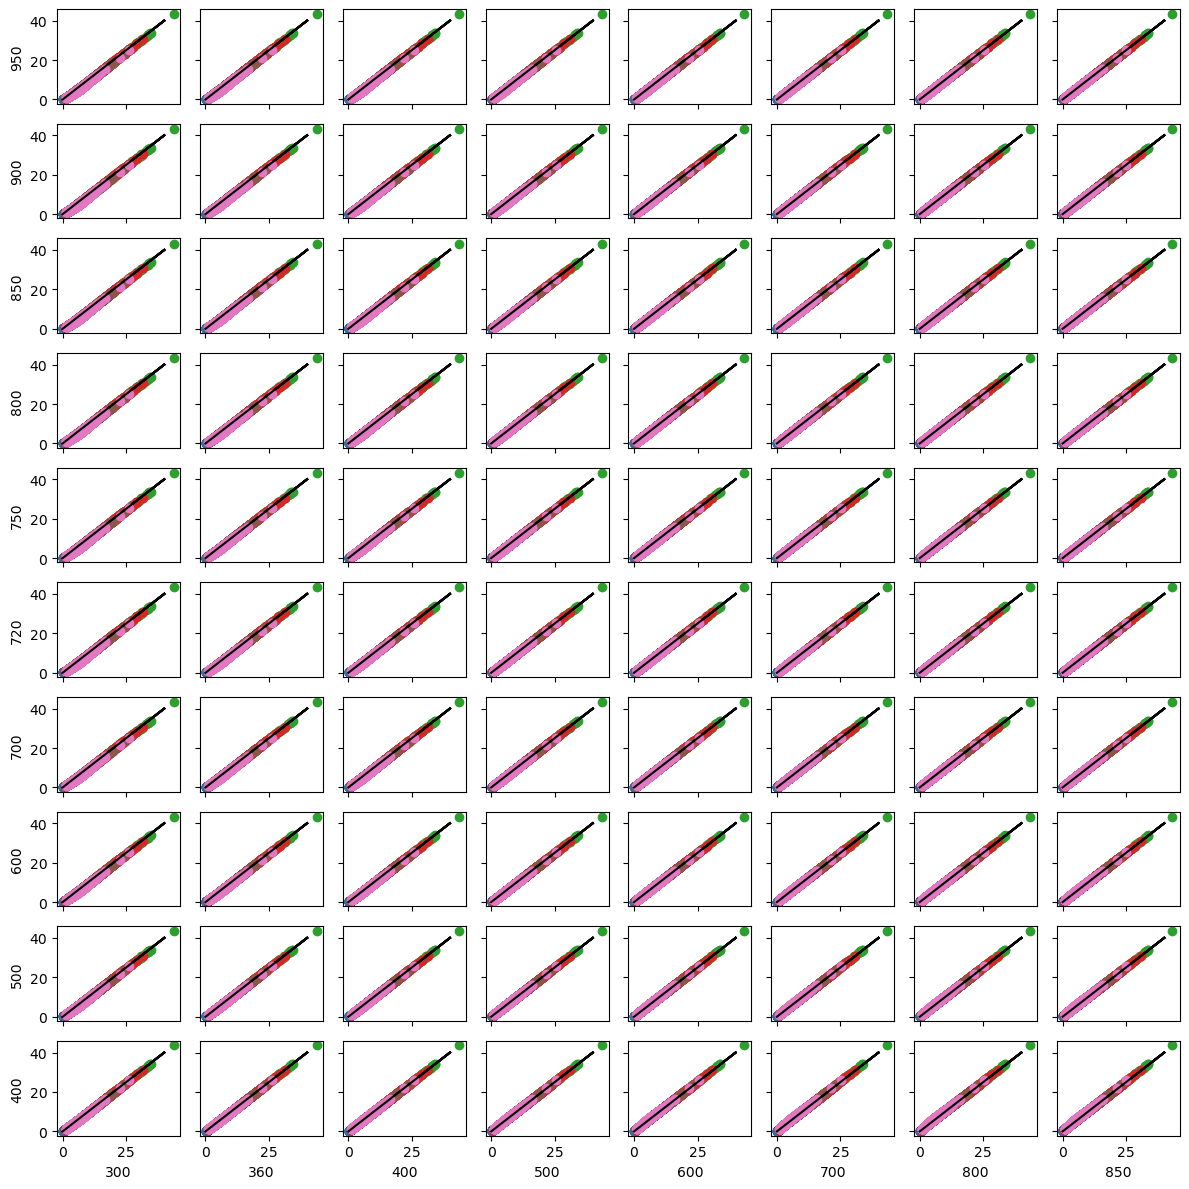

In [100]:

plt.rcParams["figure.autolayout"] = True
fig.patch.set_facecolor('xkcd:white')
smallers={300:(0,0), 360:(1,1), 400:(2,2), 500:(3,3), 600:(4,4), 700:(5,5), 800:(6,8), 850:(7,9)}
biggers={400:(9,2), 500:(8,3), 600:(7,4), 700:(6,5), 720:(5,6), 750:(4,7), 800:(3,8), 850:(2,9), 900:(1,10), 950:(0,11)}

all_fields=sorted(list(set(list(smallers.keys())+list(biggers.keys()))))


fig, axs = plt.subplots(10,8,figsize=(12,12),sharex=True,sharey=True)

for i,label in enumerate(save_labels):
    results=np.loadtxt(f'find_tau_from_R2_hyperbolic_approximation/{label}_effTimes_at_different_fields.dat')

    for smaller in smallers:
        for bigger in biggers:
            axs[biggers[bigger][0],smallers[smaller][0]].plot(results[:,smallers[smaller][1]],results[:,biggers[bigger][1]],"o",c="C"+str(i))
            axs[biggers[bigger][0],smallers[smaller][0]].plot([0,40],[0,40],'-',c='black') 
        
for xlabel,column in smallers.items():
    axs[9,column[0]].set_xlabel(xlabel)
    
for ylabel,row in biggers.items():
    axs[row[0],0].set_ylabel(ylabel)
    
plt.savefig('different_fields_MD_lin_appr.png')

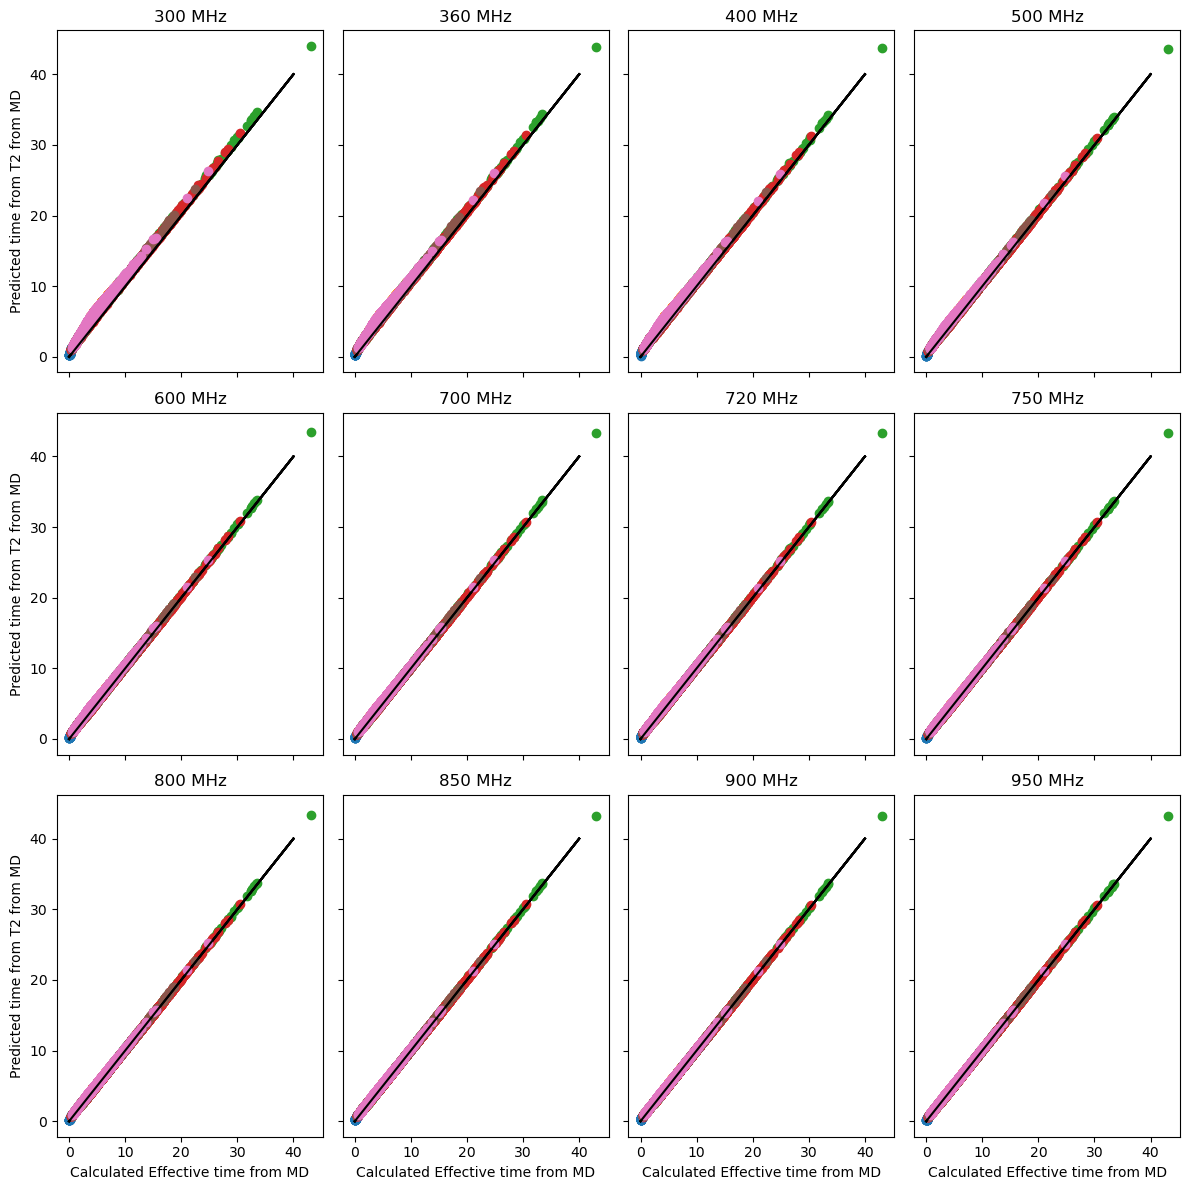

In [101]:
plt.rcParams["figure.autolayout"] = True
fig.patch.set_facecolor('xkcd:white')
smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}

all_fields=sorted(list(set(list(smallers.keys())+list(biggers.keys()))))


fig, axs = plt.subplots(3,4,figsize=(12,12),sharex=True,sharey=True)


for i,label in enumerate(save_labels):
    results=np.loadtxt(f'find_tau_from_R2_hyperbolic_approximation/{label}_effTimes_at_different_fields.dat')

    for j,field in enumerate(all_fields):                    
        axs[j//4,j%4].plot(results[:,-1],results[:,j],"o",c="C"+str(i))
        axs[j//4,j%4].plot([0,40],[0,40],'-',c='black') 
        axs[j//4,j%4].set_title(f'{field} MHz')
        axs[2,j%4].set_xlabel(f'Calculated Effective time from MD')
        axs[j//4,0].set_ylabel(f'Predicted time from T2 from MD')
plt.savefig('calculated_vs_predicted_effT_linn_approx.png')

<H3>Code from the last time - in there the correlation was very good</H3>

In [96]:
gammaH=267.513*10**6;

smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}

magn_fields_MHz=sorted(list(set(list(smallers.keys())+list(biggers.keys()))))

results={}
for field in magn_fields_MHz:
    results[field]=[]

for i,timescales in enumerate([timescales_yamls_efsthatia,timescales_yamls_prot,
                              timescales_yamls_calmodulin,timescales_yamls_CDNF,
                              timescales_yamls_EN2,timescales_yamls_musMANF,
                              timescales_yamls_tonB]):
  
    for sim in timescales:        
        #check if timesales exist
        for ana2 in timescales[sim]:
            info=timescales[sim][ana2]["info"]
            #select the analysis that we used
            if (info["04_smallest_corr_time_[s]"]==10**(-12) and
                info["05_biggest_corr_time_[s]"]==10**(-7) and
                info["03_N_exp_to_fit"]==100 and
                info["00_nuclei"]=='15N'):

                for bond in timescales[sim][ana2]["results"]["Coeff"]:
                    if timescales[sim][ana2]["results"]["Coeff"][bond][-1]>0:
                        timescales[sim][ana2]["results"]["Coeff"][bond][-1]=0
                    
                    coeff=timescales[sim][ana2]["results"]["Coeff"][bond]
                    ctime=timescales[sim][ana2]["results"]["Ctime"]
                    effTime=sum(t*k for t,k in zip(coeff,ctime))*10**9


                    for magn_field_MHz in magn_fields_MHz:
                        magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
                        T1,T2,NOE=rt.get_relaxation_N(magnetic_field,coeff,ctime,0)
                        results[magn_field_MHz].append(srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/T2)*10**9)


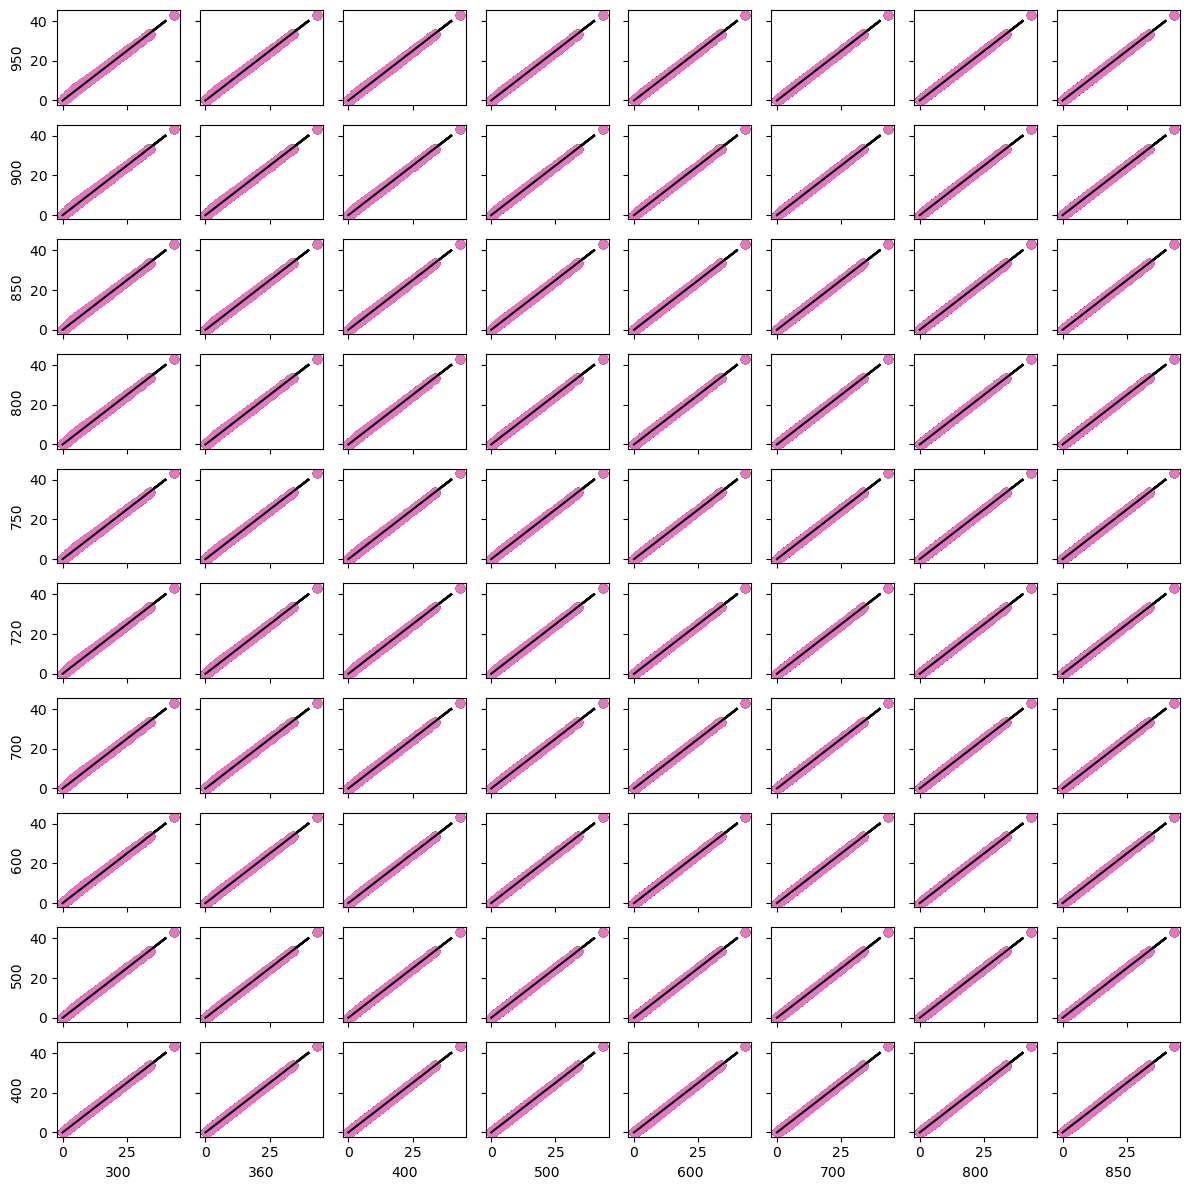

In [97]:

plt.rcParams["figure.autolayout"] = True
fig.patch.set_facecolor('xkcd:white')
smallers={300:(0,0), 360:(1,1), 400:(2,2), 500:(3,3), 600:(4,4), 700:(5,5), 800:(6,8), 850:(7,9)}
biggers={400:(9,2), 500:(8,3), 600:(7,4), 700:(6,5), 720:(5,6), 750:(4,7), 800:(3,8), 850:(2,9), 900:(1,10), 950:(0,11)}

all_fields=sorted(list(set(list(smallers.keys())+list(biggers.keys()))))


fig, axs = plt.subplots(10,8,figsize=(12,12),sharex=True,sharey=True)

for i,label in enumerate(save_labels):
    
    for smaller in smallers:
        for bigger in biggers:
            axs[biggers[bigger][0],smallers[smaller][0]].plot(results[smaller],results[bigger],"o",c="C"+str(i))
            axs[biggers[bigger][0],smallers[smaller][0]].plot([0,40],[0,40],'-',c='black') 
        
for xlabel,column in smallers.items():
    axs[9,column[0]].set_xlabel(xlabel)
    
for ylabel,row in biggers.items():
    axs[row[0],0].set_ylabel(ylabel)
    
plt.savefig('different_fields_MD_lin_poly1d2.png')

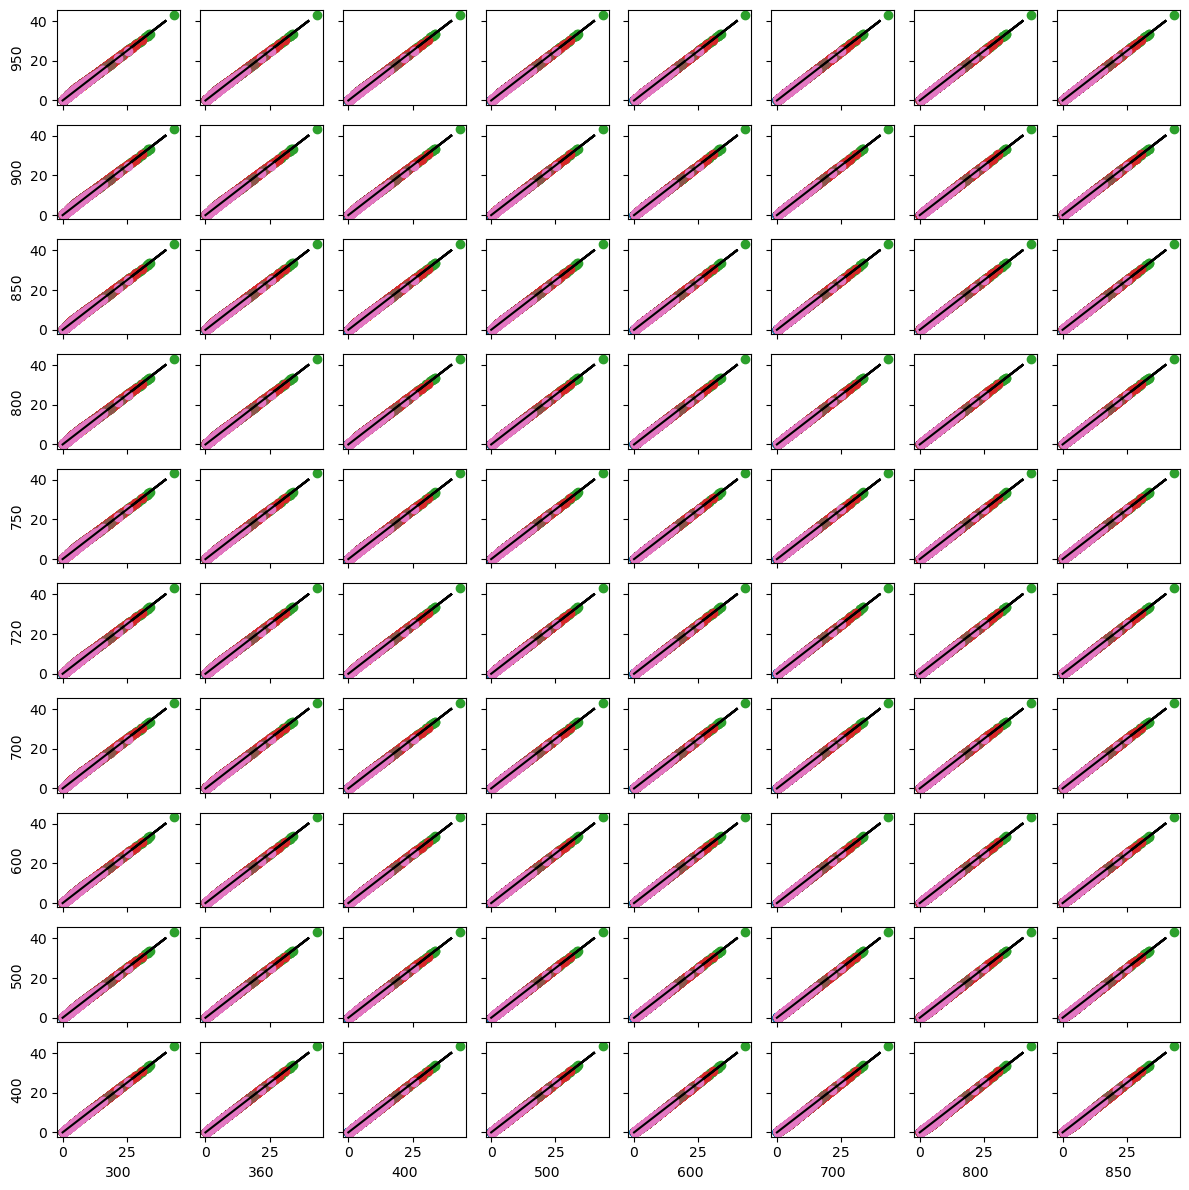

In [98]:
gammaH=267.513*10**6;

smallers={300:0, 360:1, 400:2, 500:3, 600:4, 700:5, 800:6, 850:7}
biggers={400:9, 500:8, 600:7, 700:6, 720:5, 750:4, 800:3, 850:2, 900:1, 950:0}

magn_fields_MHz=sorted(list(set(list(smallers.keys())+list(biggers.keys()))))

results={}
for field in magn_fields_MHz:
    results[field]=[]

    plt.rcParams["figure.autolayout"] = True
fig.patch.set_facecolor('xkcd:white')
smallers={300:(0,0), 360:(1,1), 400:(2,2), 500:(3,3), 600:(4,4), 700:(5,5), 800:(6,8), 850:(7,9)}
biggers={400:(9,2), 500:(8,3), 600:(7,4), 700:(6,5), 720:(5,6), 750:(4,7), 800:(3,8), 850:(2,9), 900:(1,10), 950:(0,11)}

all_fields=sorted(list(set(list(smallers.keys())+list(biggers.keys()))))


fig, axs = plt.subplots(10,8,figsize=(12,12),sharex=True,sharey=True)

for i,timescales in enumerate([timescales_yamls_efsthatia,timescales_yamls_prot,
                              timescales_yamls_calmodulin,timescales_yamls_CDNF,
                              timescales_yamls_EN2,timescales_yamls_musMANF,
                              timescales_yamls_tonB]):
    for field in magn_fields_MHz:
        results[field]=[]
    for sim in timescales:        
        #check if timesales exist
        for ana2 in timescales[sim]:
            info=timescales[sim][ana2]["info"]
            #select the analysis that we used
            if (info["04_smallest_corr_time_[s]"]==10**(-12) and
                info["05_biggest_corr_time_[s]"]==10**(-7) and
                info["03_N_exp_to_fit"]==100 and
                info["00_nuclei"]=='15N'):

                for bond in timescales[sim][ana2]["results"]["Coeff"]:
                    if timescales[sim][ana2]["results"]["Coeff"][bond][-1]>0:
                        timescales[sim][ana2]["results"]["Coeff"][bond][-1]=0
                    
                    coeff=timescales[sim][ana2]["results"]["Coeff"][bond]
                    ctime=timescales[sim][ana2]["results"]["Ctime"]
                    effTime=sum(t*k for t,k in zip(coeff,ctime))*10**9


                    for magn_field_MHz in magn_fields_MHz:
                        magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
                        T1,T2,NOE=rt.get_relaxation_N(magnetic_field,coeff,ctime,0)
                        results[magn_field_MHz].append(srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/T2)*10**9)


    for smaller in smallers:
        for bigger in biggers:
            axs[biggers[bigger][0],smallers[smaller][0]].plot(results[smaller],results[bigger],"o",c="C"+str(i))
            axs[biggers[bigger][0],smallers[smaller][0]].plot([0,40],[0,40],'-',c='black') 
        
for xlabel,column in smallers.items():
    axs[9,column[0]].set_xlabel(xlabel)
    
for ylabel,row in biggers.items():
    axs[row[0],0].set_ylabel(ylabel)
    
plt.savefig('different_fields_MD_lin_poly1d2.png')